# Calculating maturation times for different biological organisms


## Introduction

Here, we're calculating the normalized maturation time for different organisms. These calculations rely heavily on the model presented in G. B. West, J. H. Brown, and B. J. Enquist, ‘A General Model for Ontogenetic Growth’, Nature, 413.6856 (2001), 628–31

In Figure 2, the authors present the universal growth curve showing development for many animals proceeds along a similar trajectory, and this trajectory collapses to the same when accounting for parameters such as birth mass, maturation mass, and $a$ (the ratio of energy required to maintain a cell versus create a new one).

Let's assume that 95% of the maturation time is the developed for all the species. We can use the universal growth law presented in figure 2 to calculate the dimensionless development time, $\tau$.

$r = 1 - e^{-\tau}$

$0.95 = 1 - e^{-\tau} \rightarrow \tau \approx 3$

As presented in the manuscript, is calculable from the our parameters as follows:

$\tau = \frac{at}{4 M^{1/4}}-\ln \left[ 1- \left( \frac{m_0}{M} \right)^{1/4} \right]$

Plug in our value for 3 for $\tau$ and figure out the maturation time, $t_m$ for different organisms


In [23]:
#load the data from the excel file

import pandas as pd
import numpy as np
import pprint

trajectories=pd.read_excel("trajectories.xls")

#separate the trajectories by the study number
studyNumbers = np.unique(np.array(trajectories[['Study Number']]).flatten())

studyDictionary = {}

#define the animal for each
animalNames ={
    1:"Guppy",
    2:"Heron", 
    3:"Hen",
    4:"Salmon",
    5:"Rat",
    6:"Atlantic Cod",
    7:"Robin",
    8:"Shrew",
    9:"Guinea Pig",
    10:"Domestic Rabbit",
    11:"Domestic Pig",
    12:"Cow",
    13:"Shrimp"
}

#loop through each study number and populate the trajectory
for i in studyNumbers:
    query =trajectories['Study Number']==i
    times=np.array(trajectories['Time'][(query)])
    masses=np.array(trajectories['Mass (g)'][(query)])
    studyDictionary[animalNames[i]]={"time": times, "mass": masses}
    
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(studyDictionary)
    

{   'Atlantic Cod': {   'mass': array([ 908.9489431,  836.2956457, 1329.14343  , 1122.475802 ,
       1750.552731 , 1750.552731 , 2582.96509  , 3134.099678 ,
       4102.955528 , 3233.107335 , 5398.212079 , 5985.896624 ,
       6454.179186 , 5985.896624 ]),
                        'time': array([1460. , 1460. , 1825. , 1825. , 2190. , 2190. , 2482. , 2445.5,
       2737.5, 2847. , 3285. , 3285. , 3540.5, 3540.5])},
    'Cow': {   'mass': array([ 33333.3333,  41666.6667,  54166.6667,  75000.    , 108333.333 ,
       133333.333 , 158333.333 , 191666.667 , 216666.667 , 233333.333 ,
       283333.333 , 300000.    , 333333.333 , 358333.333 , 366666.667 ,
       395833.333 , 404166.667 , 416666.667 , 433333.333 , 441666.667 ,
       441666.667 ]),
               'time': array([   0.,   60.,   90.,  120.,  180.,  210.,  240.,  300.,  390.,
        420.,  570.,  600.,  690.,  900., 1050., 1290., 1350., 1650.,
       2010., 2250., 2400.])},
    'Domestic Pig': {   'mass': array([  5000.,  10000

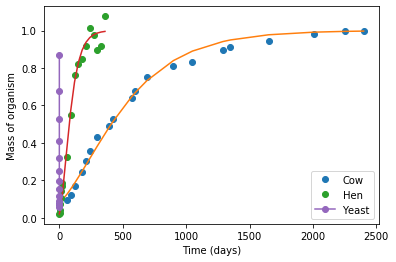

In [56]:
#plot the trajectories
import matplotlib.pyplot as plt

#use the West et al. equation to do the smooth curve

def ontogeneticModel(t, a, M, m0):
    inner=a*t/(4*np.power(M,0.25))
    return np.power(1-(1-np.power(m0/M,0.25))*np.exp(-inner),4)


#define the fitted parameters from West et al. 2001
fittedParameters = { "Cow": 
               {
                   "a": 0.276,
                    "M": 442000,
                    "m0": 33333
                   },
           "Hen":
               {
                   "a": 0.47,
                   "m0": 43,
                   "M": 2100
               }
}


#define the trajectories that we wish to plot
trajectoriesOfInterest=fittedParameters.keys()

for i in trajectoriesOfInterest:
    plt.plot(studyDictionary[i]['time'], studyDictionary[i]['mass'] / fittedParameters[i]['M'],'o',label=i)
    # also create the smooth line
    smoothline=[ontogeneticModel(time,fittedParameters[i]['a'],fittedParameters[i]['M'],fittedParameters[i]['m0']) for time in studyDictionary[i]['time']]
    plt.plot(studyDictionary[i]['time'],smoothline)
    
#make the trajectory for yeast
# yeast has a growth rate of 0.3 1/h per http://bionumbers.hms.harvard.edu/bionumber.aspx?&id=107949
yeastGrowthRate=0.3 #units 1/h

#we should use the same fold increase as done with the others. let's take the highest
maxFoldChange = np.max([item["M"]/item["m0"] for item in fittedParameters.values()])

#change to log space and make an array to 
logFoldRange=np.arange(1,np.log(maxFoldChange),0.25)

#we can now calculate the time change by dividing by the growth rate
timeYeast=logFoldRange/yeastGrowthRate *1/24 #change the units to days

#can now plot the yeast on the same graph
plt.plot(timeYeast,np.exp(logFoldRange)/maxFoldChange,'o-',label="Yeast")

plt.ylabel('Mass of organism')
plt.xlabel('Time (days)')
plt.legend()
    

In [5]:
import numpy as np

#calculate the maturation time with tau = 3. Create a function first
def findMaturationTime(m0, a, M):
    time = (3+np.log(1-np.power(m0/M,0.25)))*4*np.power(M,0.25)/a
    return time

In [6]:
#for animals

#from A general model for ontogenetic growth

animals = { "cow": 
               {
                   "a": 0.276,
                    "M": 442000,
                    "m0": 33333
                   },
           "hen":
               {
                   "a": 0.47,
                   "m0": 43,
                   "M": 2100
               },
           "salmon":
               {
                   "a": 0.026,
                   "m0": 0.01,
                   "M": 2400
               },
           "shrimp":
               {
                   "a": 0.027,
                   "m0": 0.0008,
                   "M": 0.075
               }
}

maturationTimes = {}
maturationTimes["animals"] = []

for animal in animals.keys():
    time = findMaturationTime(animals[animal]["m0"],animals[animal]["a"],animals[animal]["M"])
    #print(animal + ": " + str(time*b))
    maturationTimes["animals"].append(time)

print(maturationTimes["animals"])

[843.6261427785191, 145.45643637020206, 3180.6490725998137, 202.52923078753676]


In [53]:
#for plants

#from Carbon use efficiency depends on growth respiration, maintenance respiration, and relative growth rate. A case 
#study with lettuce. M. W. VAN IERSEL. Department of Horticulture, The University of Georgia, Athens, GA 30602, USA

ratios["plants"] = np.power(np.asarray([0.2, 0.65]),-1)

print(ratios["plants"])

[5.         1.53846154]


In [54]:
#for microbes

#from Growth, metabwith open('eggs.csv', 'rb') as csvfile:
import csv 

ratios["microbes"] = []

with open('microbes.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:
        try:
            ratio = float(row[8])/float(row[9]) #dividing b by the growth rate (effectively the inverse of maturation time)
            ratios["microbes"].append(ratio)
        except ValueError:
            continue

print(ratios["microbes"])

[0.044320501967033514, 0.040834619789851104, 0.012636322892286242, 0.004558278628234392, 0.0036259034542773572, 0.09682875264270614, 0.14545454545454548, 0.024312896405919663, 0.09936575052854123, 0.08942917547568711, 0.08942917547568711, 0.021987315010570826, 0.1630021141649049, 0.0023678646934460887, 0.023044397463002114, 0.02177589852008457, 0.020380549682875265, 0.019006342494714588, 0.017272727272727273, 0.014947145877378436, 0.040380549682875265, 0.03213530655391121, 0.03213530655391121, 0.055391120507399576, 0.020338266384778016, 0.0331923890063425, 0.04947145877378436, 0.044820295983086685, 0.05412262156448203, 0.04312896405919662, 0.04101479915433404, 0.03911205073995772, 0.036786469344608885, 0.046723044397463005, 0.030866807610993658, 0.048202959830866816, 0.045243128964059194, 0.04334038054968287, 0.022621564482029597, 0.04143763213530655, 0.03911205073995772, 0.034883720930232565, 0.03340380549682875, 0.03530655391120508, 0.03572938689217759, 0.025581395348837212, 0.036786

In [59]:
#make the chart

ranges = {key: [np.amin(item), np.amax(item)] for key,item in ratios.items()}
print(ranges)



{'animals': [14.481906078958799, 17.266647510158123], 'plants': [1.5384615384615383, 5.0], 'microbes': [0.001993293323546767, 0.6077018553443913]}


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1398: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


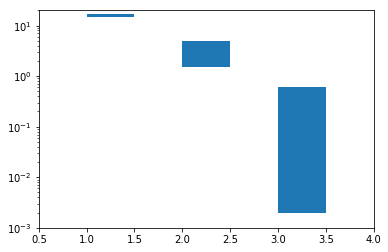

In [76]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
x=1
for key,arange in ranges.items():
    ax1.add_patch(
        patches.Rectangle(
            (x, arange[0]),   # (x,y)
            0.5,          # width
            arange[1]-arange[0],          # height
        )
    )
    x=x+1

ax1.set_xlim(0.5, 4)
ax1.set_ylim(0.001, 20)
ax1.set_yscale('log')
plt.savefig('ratio.svg')
plt.show(fig1)
